Target: quality

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("train.csv")
X_test = pd.read_csv('test.csv')
data.head()

,fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality;type
0,6.6;0.3;0.36;1.2;0.035;43;126;0.9909;3.01;0.63...
1,7.7;0.5;0.26;1.9;0.062;9;31;0.9966;3.39;0.64;9...
2,8.4;0.5;0.35;2.9;0.076;21;127;0.9976;3.23;0.63...
3,7.5;0.4;0.33;5.0;0.045;30;131;0.9942;3.32;0.44...
4,6.4;0.2;0.25;20.2;0.083;35;157;0.9998;3.17;0.5...


In [4]:
X_test.head()

,id;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;type
0,1257;7.2;0.25;0.37;2.5;0.063;11;41;0.99439;3.5...
1,6409;8.2;0.27;0.39;7.8;0.039;49;208;0.9976;3.3...
2,136;8.9;0.32;0.49;1.6;0.05;17;131;0.9956;3.13;...
3,1631;7.4;0.16;0.3;13.7;0.056;33;168;0.99825;2....
4,6084;6.4;0.28;0.56;1.7;0.156;49;106;0.99354;3....


In [5]:
data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
     'total sulfur dioxide','density','pH','sulphates','alcohol','quality','type']] = data['fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality;type'].str.split(";",expand = True)
X_test[['id','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
     'total sulfur dioxide','density','pH','sulphates','alcohol','type']] = X_test['id;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;type'].str.split(";",expand = True)
X_test = X_test.drop('id;fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;type',axis = 1)
data = data.drop('fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality;type',axis = 1)

In [6]:
X_test.head(10)

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,7.2,0.25,0.37,2.5,0.063,11,41,0.99439,3.52,0.8,12.4,red
1,6409,8.2,0.27,0.39,7.8,0.039,49,208,0.9976,3.31,0.51,9.5,white
2,136,8.9,0.32,0.49,1.6,0.05,17,131,0.9956,3.13,0.34,9.4,white
3,1631,7.4,0.16,0.3,13.7,0.056,33,168,0.99825,2.9,0.44,8.7,white
4,6084,6.4,0.28,0.56,1.7,0.156,49,106,0.99354,3.1,0.37,9.2,white
5,5434,10.2,0.54,0.37,15.4,0.214,55,95,1.00369,3.18,0.77,9,red
6,1094,7.5,0.23,0.36,7,0.036,43,161,0.9938,3.04,0.32,11,white
7,5146,6.2,0.39,0.43,2,0.071,14,24,0.99428,3.45,0.87,11.2,red
8,5921,6.2,0.35,0.29,3.9,0.041,22,79,0.99005,3.1,0.59,12.06666667,white
9,1076,8.1,0.2,0.4,2,0.037,19,87,0.9921,3.12,0.54,11.2,white


In [7]:
cat_col = 'type'
num_col = [col for col in data.columns if col != cat_col]
print(num_col)
for col in num_col:
    data[col] = data[col].astype(float)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   float64
 6   total sulfur dioxide  6714 non-null   float64
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   float64
 12  type                  6714 non-null   object 
dtypes: float64(12), object(1)
memory usage: 682.0+ KB


In [9]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,7.251638,0.348436,0.317466,5.411871,0.057506,30.132559,114.576259,0.994789,3.219103,0.536120,10.458743,5.796098
std,1.330423,0.168505,0.148842,4.739180,0.038175,17.619884,56.417138,0.003020,0.160737,0.157877,1.189933,0.883490
min,3.800000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,28.000000,117.000000,0.995100,3.210000,0.510000,10.200000,6.000000
75%,7.700000,0.400000,0.390000,8.000000,0.068000,41.000000,155.000000,0.997100,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.300000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000


In [10]:
drop_features = ['free sulfur dioxide', 'quality','pH','chlorides']

In [11]:
#num_col.remove('quality')
num_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
test_col = num_col
test_col.remove('quality')


In [13]:
scale = Normalizer().fit(data[num_col])
data[num_col] = scale.transform(data[num_col])

X_test[test_col] = scale.transform(X_test[test_col])

In [14]:
X_test.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,0.159879,0.005551,0.008216,0.055513,0.001399,0.244259,0.910421,0.022081,0.078163,0.017764,0.275347,red
1,6409,0.038276,0.001260,0.001820,0.036409,0.000182,0.228723,0.970906,0.004657,0.015450,0.002381,0.044344,white
2,136,0.067027,0.002410,0.003690,0.012050,0.000377,0.128028,0.986571,0.007498,0.023572,0.002561,0.070792,white
3,1631,0.042982,0.000929,0.001743,0.079575,0.000325,0.191676,0.975807,0.005798,0.016844,0.002556,0.050533,white
4,6084,0.054527,0.002386,0.004771,0.014484,0.001329,0.417469,0.903097,0.008465,0.026411,0.003152,0.078382,white


In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.049316,0.002242,0.002690,0.008967,0.000262,0.321302,0.941489,0.007404,0.022491,0.004707,0.085182,6.0,white
1,0.221334,0.014372,0.007474,0.054615,0.001782,0.258702,0.891086,0.028647,0.097445,0.018397,0.275949,5.0,red
2,0.064912,0.003864,0.002705,0.022410,0.000587,0.162280,0.981410,0.007709,0.024960,0.004868,0.071094,5.0,red
3,0.055482,0.002959,0.002441,0.036988,0.000333,0.221927,0.969081,0.007355,0.024560,0.003255,0.080633,6.0,white
4,0.039376,0.001231,0.001538,0.124282,0.000511,0.215340,0.965953,0.006151,0.019504,0.003076,0.055988,5.0,white


In [16]:
y = data['quality']
X = data.drop('quality',axis = 1)
test_id = X_test['id']
drop_feature_test = ['id']
X_test = X_test.drop(drop_feature_test, axis = 1)

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.049316,0.002242,0.002690,0.008967,0.000262,0.321302,0.941489,0.007404,0.022491,0.004707,0.085182,white
1,0.221334,0.014372,0.007474,0.054615,0.001782,0.258702,0.891086,0.028647,0.097445,0.018397,0.275949,red
2,0.064912,0.003864,0.002705,0.022410,0.000587,0.162280,0.981410,0.007709,0.024960,0.004868,0.071094,red
3,0.055482,0.002959,0.002441,0.036988,0.000333,0.221927,0.969081,0.007355,0.024560,0.003255,0.080633,white
4,0.039376,0.001231,0.001538,0.124282,0.000511,0.215340,0.965953,0.006151,0.019504,0.003076,0.055988,white


In [18]:
mask0 = X['type'] == 'white'
mask1 = X['type'] == 'red'
mask2 = X_test['type'] == 'white'
mask3 = X_test['type'] == 'red'
X.loc[mask0, 'type'] = 0
X.loc[mask1, 'type'] = 1
X_test.loc[mask2, 'type'] = 0
X_test.loc[mask3, 'type'] = 1


In [19]:
X = X.astype({'type':'float64'})
X_test = X_test.astype({'type':'float64'})

In [20]:
one_cor = np.ones_like(X.corr(),dtype = bool)

In [21]:
mask = np.triu(one_cor)

<AxesSubplot:>

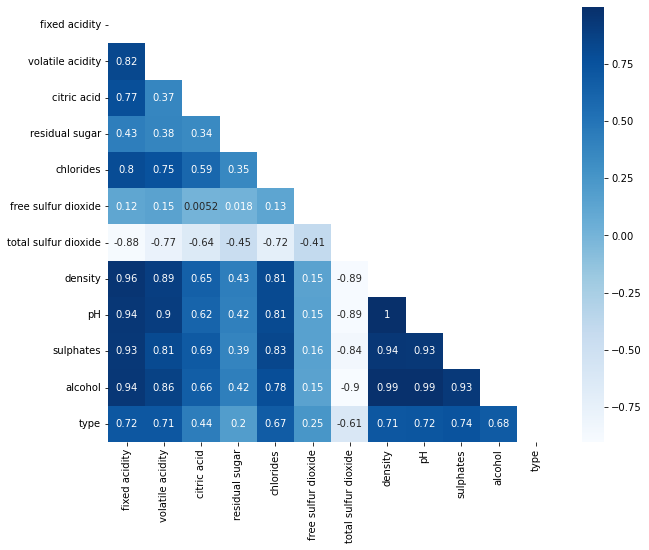

In [22]:
fig, ax = plt.subplots(figsize =(10,8))
sns.heatmap(X.corr(), cmap='Blues', annot=True, mask= mask)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state= 0)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor(n_estimators= 2000)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000)

In [26]:
pre = model.predict(X_val.head())
print(*pre)
print(y_val.head())

5.814 6.5245 5.8255 5.1165 5.7145
1363    6.0
3171    7.0
2201    6.0
6485    5.0
6283    6.0
Name: quality, dtype: float64


In [27]:
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_val, model.predict(X_val)))

0.04940925386334016
0.39060044434102753


In [28]:
predicts = model.predict(X_test)

In [30]:
output = pd.DataFrame({'id': test_id,
                      'quality':predicts})
output.to_csv('submission3.csv', index= False)